a=0.009 pm 0.001, b=0.109 pm 0.006, chi-sqr=0.003


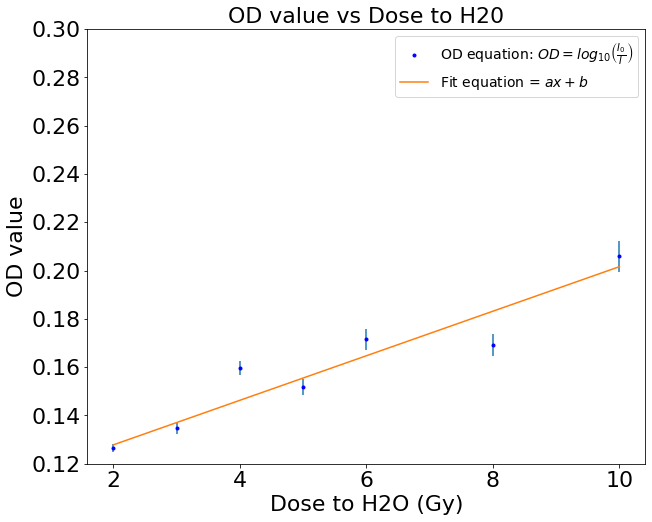

pv_min=1.000, pv_max=213.113, b=0.267, d_0=68.805 and chi-sqr=0.431


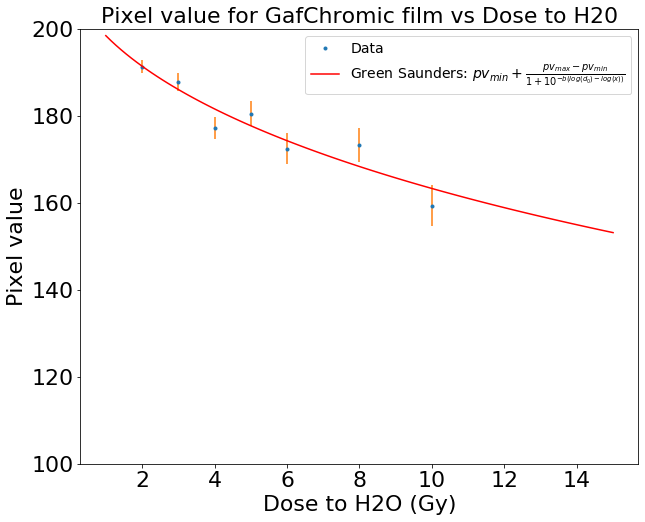

a=256.000, b=-2.303, chi-sqr=2.74e-29


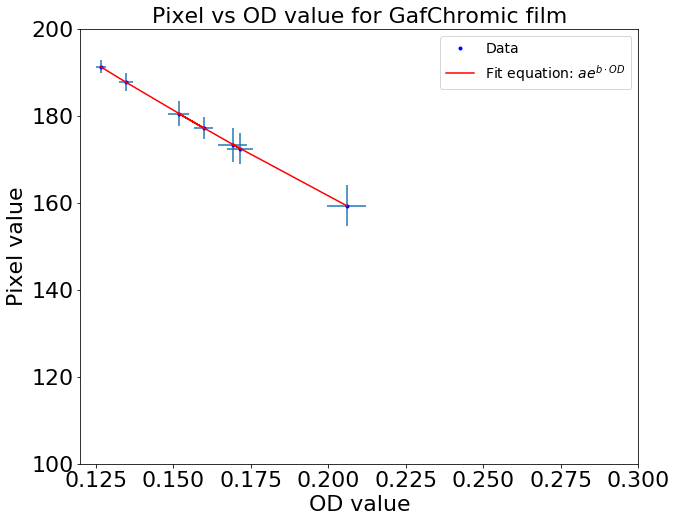

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import chisquare
from scipy.optimize import curve_fit
from scipy import stats
from scipy.optimize import least_squares
import cv2
import tifffile as tiff
import os
x = np.linspace(1,15,100)
filename = 'Calib_24hrs/Calibration_24hrs_'
params = {'legend.fontsize': '14',
          'figure.figsize': (10, 8),
         'axes.labelsize': '22',
         'axes.titlesize':'22',
         'xtick.labelsize':'22',
         'ytick.labelsize':'22'}
plt.rcParams.update(params)
path, dirs, files = next(os.walk('Calib_24hrs/'))
file_count = np.arange(0,len(files),1)

def pv(x,pv_min,pv_max,b,d_0): return (pv_min + (pv_max-pv_min))/((1+10**(-1*b*(np.log(d_0)-np.log(x)))))
def image_ret(file_num): return tiff.imread(filename+str(file_num)+'.tiff')
def pixel_val(image):
    roi = ([150,550],[120])
    x = image[:,:,0].mean(axis=0)[roi[0][0]:roi[0][1]]
    y = image[:,:,0].mean(axis=1)[roi[1][0]:]
    max_x = np.argmax(np.gradient(x))
    min_x = np.argmin(np.gradient(x))
    max_y = np.argmax(np.gradient(y))
    min_y = np.argmin(np.gradient(y))
    bckgr = image[:,:,0][:min_x,max_x:][:min_y,max_y:]
    inner = image[:,:,0][min_x:max_x][min_y:max_y]
    in_avg = np.mean(inner)
    in_std = np.std(inner)/np.sqrt(len(inner))
    bckgr_avg = np.mean(bckgr)
    bckgr_std = np.std(bckgr)
    return ([in_avg,in_std,bckgr_avg,bckgr_std])

#Average over axes without splitting them up

numbers = ([2,3,4,5,6,8,10])
doses = np.array([numbers, *[*zip(*[pixel_val(image_ret(i)) for i in numbers])]])
OD = np.log10(np.array(256)/np.array(doses[1]))
plt.plot(doses[0],OD,'b.',label=r'OD equation: $OD = log_{10}\left(\frac{I_{0}}{I}\right)$')
def poly(x,a,b):return a*x+b
popt, pcov = scipy.optimize.curve_fit(poly,doses[0],OD,p0=[0.026,0.12],sigma=np.log10(256)*(-np.log(10)*doses[2])/(doses[1]*(np.log(doses[1]))**2))
perr = np.sqrt(np.diag(pcov))
chi_fit = chisquare(OD,[poly(i,*popt) for i in doses[0]])[0]
slope, intercept, r_value, p_value, std_err = stats.linregress(doses[0],OD)
plt.errorbar(x=doses[0],y=OD,xerr=0.01, yerr=np.log10(256)*(-np.log(10)*doses[2])/(doses[1]*(np.log(doses[1]))**2),ls='None')
plt.plot(doses[0],[poly(i,*popt) for i in doses[0]],label=r'Fit equation = $ax+b$')
print('a={:.3f} pm {:.3f}, b={:.3f} pm {:.3f}, chi-sqr={:.3f}'.format(popt[0],perr[0],popt[1],perr[1],chi_fit))
plt.title("OD value vs Dose to H20")
plt.xlabel("Dose to H2O (Gy)")
plt.ylabel("OD value")
plt.ylim(0.12,0.3)
plt.legend()
plt.show()


popt, pcov = scipy.optimize.curve_fit(pv,doses[0],doses[1],p0=[1,120,1,3.5],sigma=doses[2])
chi_fit = chisquare(doses[1],[pv(i,*popt) for i in doses[0]])[0]
print('pv_min={:.3f}, pv_max={:.3f}, b={:.3f}, d_0={:.3f} and chi-sqr={:.3f}'.format(popt[0],popt[1],popt[2],popt[3],chi_fit))
plt.plot(doses[0],doses[1],'.',label='Data')
plt.errorbar(x=doses[0],y=doses[1],xerr=0.01, yerr=doses[2],ls='None')
plt.title("Pixel value for GafChromic film vs Dose to H20")
plt.xlabel("Dose to H2O (Gy)")
plt.ylabel("Pixel value")
plt.ylim(100,200)
plt.plot(x,pv(x,*popt),'r-',label=r'Green Saunders: $pv_{min}+\frac{pv_{max}-pv_{min}}{1+10^{-b(log(d_{0})-log(x))}}$')
plt.legend()
plt.show()

plt.plot(OD,doses[1],'b.',label='Data')
def fit_OD_pv(OD,a,b):return a*np.exp(b*OD)
popt, pcov = scipy.optimize.curve_fit(fit_OD_pv,OD,doses[1],p0=[1,1],sigma=doses[2])
chi_fit = chisquare(doses[1],[fit_OD_pv(i,*popt) for i in OD])[0]
print('a={:.3f}, b={:.3f}, chi-sqr={:.3g}'.format(popt[0],popt[1],chi_fit))
plt.plot(OD,fit_OD_pv(OD,*popt),'r-',label=r'Fit equation: $ae^{b\cdot OD}$')
plt.errorbar(x=OD,y=doses[1],yerr=doses[2],xerr=np.log10(256)*(-np.log(10)*doses[2])/(doses[1]*(np.log(doses[1]))**2),ls='None')
plt.title("Pixel vs OD value for GafChromic film")
plt.xlabel("OD value")
plt.xlim(0.12,0.3)
plt.ylim(100,200)
plt.ylabel("Pixel value")
plt.legend()
plt.show()

In [2]:
import tifffile as tiff
image = tiff.imread('three_gy_24hours.tiff')
green = image[:,:,0] #Used the green part of the .tiff file

FileNotFoundError: [Errno 2] No such file or directory: '/Users/edwardtaylor/Year 4 Project/three_gy_24hours.tiff'

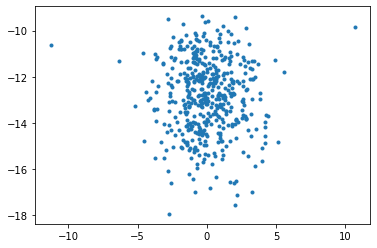

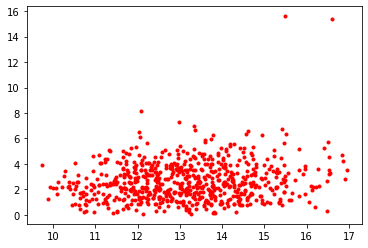

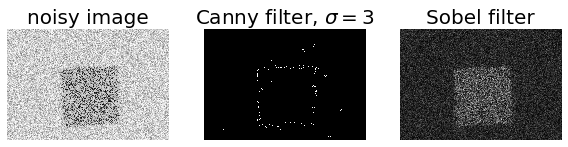

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import feature
from skimage.color import rgb2gray
grag = skimage.io.imread('ten_gy_24hours.tiff', as_gray=True)

#plt.imshow(grag)

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature

im = ndi.gaussian_filter(grag, 0.1)
im += 1 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results

from scipy import ndimage
import cv2
im = cv2.bitwise_not(im)

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)
#plt.imshow(sob)
plt.plot(sx[:,0],sy[:,0],'.')
plt.show()
plt.plot(sob[0],sob[1],'r.')

fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges2, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=3$', fontsize=20)

ax3.imshow(sob, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Sobel filter', fontsize=20)
fig.tight_layout()

plt.show()

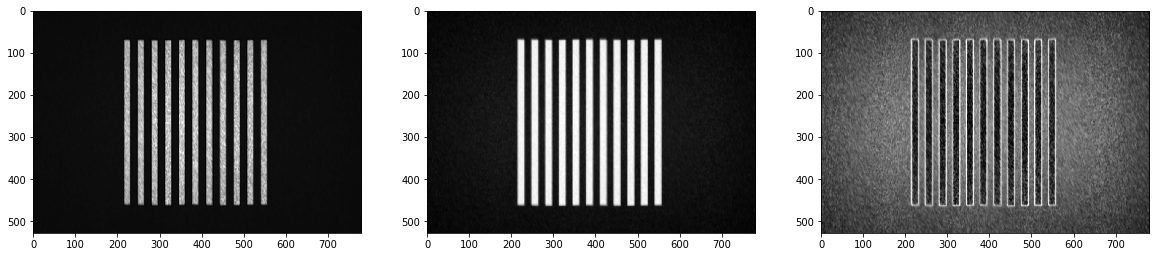

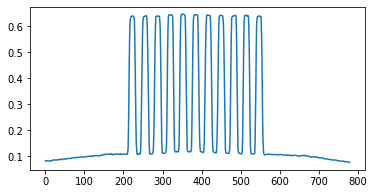

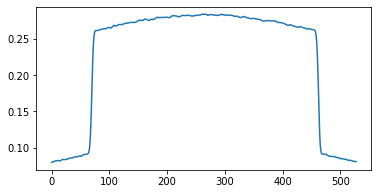

In [163]:
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

fn = r'TestImage.png'
a = plt.imread(fn)

fig, ax = plt.subplots(ncols=3, figsize=(20,18))
ax[0].imshow(a[:,:,0], cmap='gray')
ax[1].imshow(a[:,:,1], cmap='gray')
ax[2].imshow(a[:,:,2], cmap='gray')
plt.show()

def find_edges(x): return np.argwhere(x<np.quantile(x,0.3)),x[np.argwhere(x<np.quantile(x,0.3))]
#Returns the positions of the minima are and what their values are
def find_background(x): return np.argwhere(x>np.quantile(x,0.5)),x[np.argwhere(x>np.quantile(x,0.5))]

fig, ax = plt.subplots(figsize=(6,3))
ax.plot(a[:,:,1].mean(axis=0))
#ax.plot(find_background(a[:,:,0].mean(axis=0))[0],find_background(a[:,:,0].mean(axis=0))[1],'.r')
#ax.plot(find_edges(a[:,:,0].mean(axis=0))[0],find_edges(a[:,:,0].mean(axis=0))[1])
plt.show()
 
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(a[:,:,1].mean(axis=1))
#ax.plot(find_edges(a[:,:,0].mean(axis=1))[0],find_edges(a[:,:,0].mean(axis=1))[1])
plt.show()


(0.5661732871539709, 0.1422638071731609)


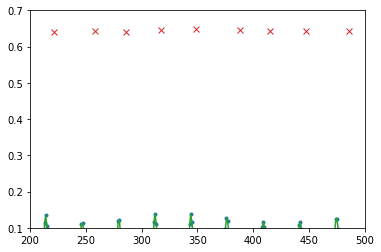

In [165]:
from scipy.optimize import curve_fit
from scipy.stats import rankdata
import numpy as np
from scipy.signal import find_peaks

#x = np.arange(0,np.max(a[:,:,1].mean(axis=1)),len(a[:,:,1].mean(axis=1)))
#def top_hat(x,p,a,b,h): return np.piecewise(x,condlist=[p+a<x<p-a,x>p+a,x<p-a],funclist =[h+b,b,b])
#plt.plot(a[:,:,1].mean(axis=0))
#plt.plot(np.gradient(a[:,:,1].mean(axis=0)))
#h = np.argmin(np.gradient(a[:,:,1].mean(axis=1)))

#plt.plot(np.arange(h,len(a[:,:,1].mean(axis=1))),np.gradient(a[:,:,1].mean(axis=1))[h:])
#plt.plot(rankdata(np.gradient(a[:,:,1].mean(axis=0))))
#popt,pcov = scipy.optimize.curve_fit(top_hat,x,a[:,:,1].mean(axis=1),p0=[80,20,0.01,0.1])

#Need to find positions where gradient is >0 and <0 to find positions of peaks and troughs
#Need to plot Loretnz peak to find base width of peak to get rid of this from the averaging
data = a[:,:,1].mean(axis=0)
grad = np.gradient(data)
pos = np.where(grad>0)[0]
neg = np.where(grad<0)[0]
grad_pos = grad[pos]
grad_neg = grad[neg] 


edge_pos = pos[np.where(grad_pos>np.mean(grad_pos))[0]]
edge_neg = neg[np.where(grad_neg<np.mean(grad_neg))[0]]

#print(np.where(np.ediff1d(edge_pos)>1))
#print(edge_pos[np.where(np.ediff1d(edge_pos)>1)])
#print(np.where(np.ediff1d(edge_neg)>1))
#print(edge_neg[np.where(np.ediff1d(edge_neg)>1)])

plt.plot(edge_pos,grad_pos[np.where(grad_pos>np.mean(grad_pos))],'.')
plt.plot(edge_neg,grad_neg[np.where(grad_neg<np.mean(grad_neg))],'.')

plt.xlim(200,500)
plt.ylim(0.1,0.7)


plt.plot(grad)
def find_mid_ranges(edge_neg,edge_pos,data):
    peak = np.array([])
    peaky = np.array([])
    eg_neg = np.where(np.ediff1d(edge_neg)>1)
    eg_pos = np.where(np.ediff1d(edge_pos)>1)
    for i in range(len(eg_pos[0])):
        f = edge_pos[eg_pos][i]
        g = edge_neg[eg_neg][i]
        peak = np.append(peak,data[f:g])
    peak_mean = np.mean(peak)
    peak_std = np.std(peak)
    return peak_mean,peak_std

peaks, _ = find_peaks(data, height = np.mean(data),width =3, plateau_size = 1)
plt.plot(peaks,data[peaks],'x')
#First element in gap_a to first element gap_b
#Loop like this until the end of either array
#need first element in each of the arrays 
#Need first element then element of the change +1

#print(edge_neg)
#print(edge_pos)
#print(edge_neg[np.where(np.ediff1d(edge_neg)>1)])
#print(edge_pos[np.where(np.ediff1d(edge_pos)>1)])

#first element in edge_pos
#first element in edge_neg

#element of max jump in edge_pos +1
#element of max jump in edge_neg +1

#element of max jump 2 in edge_pos +1
#element of max jump 2 in edge_neg +1


print(find_mid_ranges(edge_neg,edge_pos,data))

plt.show()

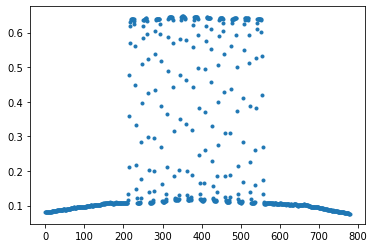

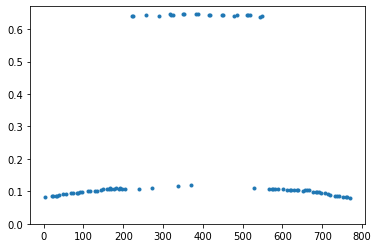

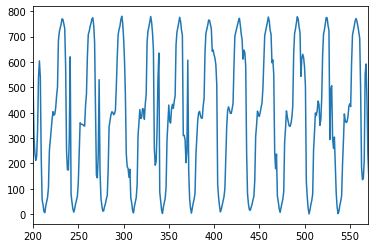

In [167]:
from numpy.linalg import inv 
def test_func(data,slit_number):
    rank = rankdata(np.gradient(data))
    peak = rank[0:slit_number]
    trgh = rank[-slit_number:]
    return peak,trgh
    
    
from scipy.signal import argrelextrema
plt.plot(data,'.')
plt.show()
a = argrelextrema(data,comparator=np.greater,order=1)
plt.plot(a[0], data[a],'.')
plt.ylim(0,0.67)
plt.show()
plt.xlim(200,570)
inv_data = 1/data 
inv_grad = np.gradient(inv_data)
plt.plot(rankdata(inv_grad))
#print(test_func(data,11))
plt.show()